# Programming for Data Analytics 

## Lab 07.01: knock weather

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Get Dataset

In [12]:
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/mly4935.csv", 
skiprows=19) 
print(df.head(3))

   year  month  meant maxtp mintp  mnmax  mnmin   rain gmin wdsp maxgt sun
0  1996      8   13.4  20.4   7.3   16.6   10.3  109.4  5.3  8.3    34    
1  1996     10    9.7               12.5    7.0                           
2  1996     11    5.0                7.6    2.5                           


### Correlation Assessment

In [13]:
corrtemp = df["month"].corr(df["meant"]) 
print(corrtemp)

0.2603649037766405


### Tidy the wind data for regression analysis

In [14]:
cleandf = df[["month","wdsp"]] 

In [15]:
# https://stackoverflow.com/questions/29314033/drop-rows-containing-empty-cells-from-apandas-dataframe

cleandf['wdsp']= cleandf.loc[:,('wdsp')].replace(' ', np.nan) 
cleandf.dropna(inplace=True) 

C:\Users\eCron\AppData\Local\Temp\ipykernel_9480\513846629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandf['wdsp']= cleandf.loc[:,('wdsp')].replace(' ', np.nan)
C:\Users\eCron\AppData\Local\Temp\ipykernel_9480\513846629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandf.dropna(inplace=True)


In [16]:
# convert the wind speed to floats 
cleandf['wdsp'] = cleandf['wdsp'].astype(float) 

C:\Users\eCron\AppData\Local\Temp\ipykernel_9480\2514420534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandf['wdsp'] = cleandf['wdsp'].astype(float)


### Analysis

In [17]:
# Correlation Assessment
corrwind = cleandf["month"].corr(cleandf["wdsp"]) 
print (f"wind correlation {corrwind}") 

wind correlation -0.1952296931683803


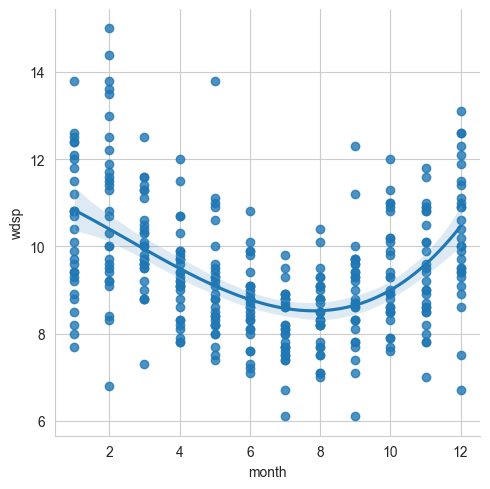

In [18]:
# Regresssion Plot
sns.set_style('whitegrid') 
#sns.scatterplot(x='total_bill',y='tip',data=dataset) 
sns.lmplot(x='month', y='wdsp', order=3, data=cleandf) 
plt.show() 

## Lab 07.02: regression

In [19]:
# import libraries

import seaborn as sns 
import matplotlib.pyplot as plt 
 
# load the dataset 
dataset = sns.load_dataset('tips') 
 
print(dataset.head()) 

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


### Regression Plot

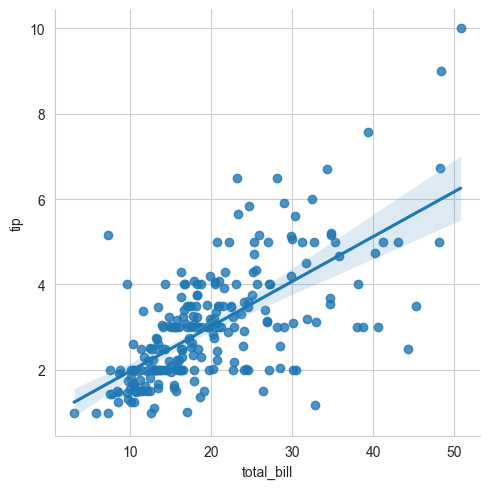

In [20]:
import seaborn as sns 
import matplotlib.pyplot as plt 
 
# load the dataset 
dataset = sns.load_dataset('tips') 
 
# the for debugging 
#print(dataset.head()) 
sns.set_style('whitegrid') 
sns.lmplot(x='total_bill', y='tip', order=1, data=dataset) 
 
plt.show()